# Multi-class Classification & Kernel Methods

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC, SVC
from mnist import MNIST

*Plot function

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

## Linear predictor
A linear predictor is used to solve a classification problem with three classes. The data is two dimensional and the linear functions for each class are:
\begin{itemize}
\item Class 1: w1 = (1, 1), b1 = 0
\item Class 2: w2 = (1, 0), b2 = 1
\item Class 3: w3 = (0, 1), b3 = −1
\end{itemize}

Draw the resulting decision boundary and clearly mark the region corresponding to each class.

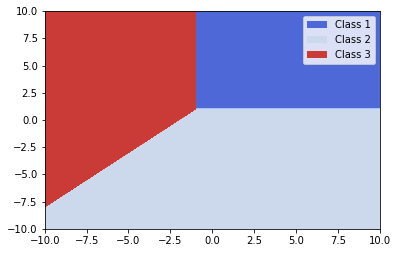

In [3]:
def pre_percep(w, b, X):
    label = []
    for x in X:
        label.append(np.argmax([w[i].dot(x) + b[i] for i in range(0, len(b))]))
    return label

w = np.array([[1,1], [1,0], [0,1]])
b = np.array([0,1,-1])

x_min, x_max = -10, 10
y_min, y_max = -10, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
z = np.array(pre_percep(w, b, np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

fig, ax = plt.subplots()

cs = plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm)

proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in [cs.collections[0], cs.collections[3], cs.collections[7]]]

plt.legend(proxy, ["Class 1", "Class 2", "Class 3"])

plt.show()
fig.savefig('./graphs/1.png')

## Multi-class perceptron

### Load data
Load in the data set data0.txt. This has 2-d data in four classes (coded as 0,1,2,3). Each row consists of three numbers: the two coordinates of the data points and the label.

In [5]:
with open('data0.txt') as f0:
    content0 = f0.read().splitlines()
    data0 = [map(int, line.split()) for line in content0 if line != '']

x0 = np.array([[d[0], d[1]] for d in data0])
label0 = np.array([d[2] for d in data0])

### Learn a classifier

In [6]:
w0 = np.array([[0, 0]]*4)
b0 = np.array([0]*4)

while (pre_percep(w0, b0, x0) == label0).all() == False:
    for d in data0:
        pre_labelx0 = np.argmax([w0[i].dot([d[0], d[1]]) + b0[i] for i in range(0, 4)])
        while d[2] != pre_labelx0:
            w0[d[2]] += [d[0], d[1]]
            b0[d[2]] += 1
            w0[pre_labelx0] -= [d[0], d[1]] 
            b0[pre_labelx0] -= 1
            pre_labelx0 = np.argmax([w0[i].dot([d[0], d[1]]) + b0[i] for i in range(0, 4)])

### Plot
shows all the data points (with different colors and shapes for different labels) as well as the decision regions.

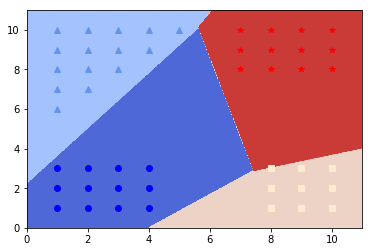

In [7]:
xx0, yy0 = make_meshgrid(x0[:,0], x0[:,1])
z0 = np.array(pre_percep(w0, b0, np.c_[xx0.ravel(), yy0.ravel()])).reshape(xx0.shape)

#clf = Perceptron(max_iter=1000).fit(x, label)
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig0, ax0 = plt.subplots()

ax0.contourf(xx0, yy0, z0, cmap=plt.cm.coolwarm)

for d in data0:
    if d[2] == 0:
        sty = 'o'
        ax0.plot(d[0], d[1], marker=sty, c='b')
    elif d[2] == 1:
        sty = '^'
        ax0.plot(d[0], d[1], marker=sty, c='cornflowerblue')
    elif d[2] == 2:
        sty = 's'
        ax0.plot(d[0], d[1], marker=sty, c='blanchedalmond')
    else:
        sty = '*'
        ax0.plot(d[0], d[1], marker=sty, c='r')
plt.show()
fig0.savefig('./graphs/mp.png')

## Kernel Perceptron

### Load data

The data sets data1.txt and data2.txt contain 2-d data with two classes (coded as −1 and 1).
Each row has three numbers: the two coordinates of the data points and the label.

In [8]:
with open('data1.txt') as f1:
    content1 = f1.read().splitlines()
    data1 = [map(int, line.split()) for line in content1 if line != '']
    
x1 = np.array([[d[0], d[1]] for d in data1])
label1 = np.array([d[2] for d in data1])

with open('data2.txt') as f2:
    content2 = f2.read().splitlines()
    data2 = [map(int, line.split()) for line in content2 if line != '']
    
x2 = np.array([[d[0], d[1]] for d in data2])
label2 = np.array([d[2] for d in data2])

### Quadratic Kernel

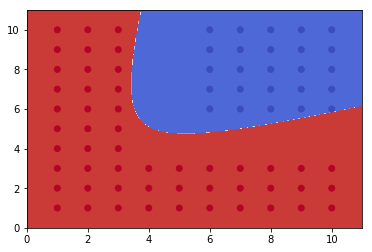

In [10]:
def pre_percep_kernel(alpha, b, oriX, newX, Y):
    label = []
    for x in newX:
        label.append(np.sign(sum(alpha[j]*Y[j]*(1+oriX[j].dot(x))**2 for j in xrange(0, len(oriX))) + b))
    return label

alpha_1 = np.zeros(len(x1))
b1 = 0
while (pre_percep_kernel(alpha_1, b1, x1, x1, label1) == label1).all() == False:
    for i in xrange(0, len(x1)):
        pre_labelx1 = np.sign(label1[i]*(sum(alpha_1[j]*label1[j]*(1+x1[j].dot(x1[i]))**2 for j in xrange(0, len(x1))) + b1))
        while pre_labelx1 <= 0:
            alpha_1[i] += 1
            b1 += label1[i]
            pre_labelx1 = np.sign(label1[i]*(sum(alpha_1[j]*label1[j]*(1+x1[j].dot(x1[i]))**2 for j in xrange(0, len(x1))) + b1))
        
xx1_q, yy1_q = make_meshgrid(x1[:,0], x1[:,1])
z1_q = np.array(pre_percep_kernel(alpha_1, b1, x1, np.c_[xx1_q.ravel(), yy1_q.ravel()], label1)).reshape(xx1_q.shape)

fig1_q, ax1_q = plt.subplots()

ax1_q.contourf(xx1_q, yy1_q, z1_q, cmap=plt.cm.coolwarm)
ax1_q.scatter(x1[:, 0], x1[:, 1], c=label1, cmap=plt.cm.coolwarm)
plt.show()
#fig1.savefig('./graphs/qkp1.png')

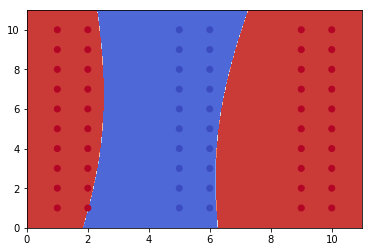

In [11]:
alpha_2 = np.zeros(len(x2))
b2 = 0

while (pre_percep_kernel(alpha_2, b2, x2, x2, label2) == label2).all() == False:
    for i in xrange(0, len(x2)):
        pre_labelx2 = np.sign(label2[i]*(sum(alpha_2[j]*label2[j]*(1+x2[j].dot(x2[i]))**2 for j in xrange(0, len(x2))) + b2))
        while pre_labelx2 <= 0:
            alpha_2[i] += 1
            b2 += label2[i]
            pre_labelx2 = np.sign(label2[i]*(sum(alpha_2[j]*label2[j]*(1+x2[j].dot(x2[i]))**2 for j in xrange(0, len(x2))) + b2))
            
xx2_q, yy2_q = make_meshgrid(x2[:,0], x2[:,1])
z2_q = np.array(pre_percep_kernel(alpha_2, b2, x2, np.c_[xx2_q.ravel(), yy2_q.ravel()], label2)).reshape(xx2_q.shape)

fig2_q, ax2_q = plt.subplots()

ax2_q.contourf(xx2_q, yy2_q, z2_q, cmap=plt.cm.coolwarm)
ax2_q.scatter(x2[:, 0], x2[:, 1], c=label2, cmap=plt.cm.coolwarm)
plt.show()
#fig2_q.savefig('./graphs/qkp2.png')

### RBF Kernel

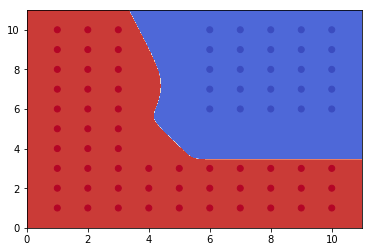

In [12]:
def pre_percep_kernel_rbf(alpha, b, s, oriX, newX, Y):
    label = []
    for x in newX:
        label.append(np.sign(sum(alpha[j]*Y[j]*np.exp(-(np.linalg.norm(oriX[j] - x)/s)**2) for j in xrange(0, len(oriX))) + b))
    return label

alpha_3 = np.zeros(len(x1))
b3 = 0
s1 = 1
while (pre_percep_kernel_rbf(alpha_3, b3, s1, x1, x1, label1) == label1).all() == False:
    for i in xrange(0, len(x1)):
        pre_labelx1 = np.sign(label1[i]*(sum(alpha_3[j]*label1[j]*np.exp(-(np.linalg.norm(x1[j] - x1[i])/s1)**2) for j in xrange(0, len(x1))) + b3))
        while pre_labelx1 <= 0:
            alpha_3[i] += 1
            b3 += label1[i]
            pre_labelx1 = np.sign(label1[i]*(sum(alpha_3[j]*label1[j]*np.exp(-(np.linalg.norm(x1[j] - x1[i])/s1)**2) for j in xrange(0, len(x1))) + b3))
        
xx1_r, yy1_r = make_meshgrid(x1[:,0], x1[:,1])
z1_r = np.array(pre_percep_kernel_rbf(alpha_3, b3, 1, x1, np.c_[xx1_r.ravel(), yy1_r.ravel()], label1)).reshape(xx1_r.shape)

fig1_r, ax1_r = plt.subplots()

ax1_r.contourf(xx1_r, yy1_r, z1_r, cmap=plt.cm.coolwarm)
ax1_r.scatter(x1[:, 0], x1[:, 1], c=label1, cmap=plt.cm.coolwarm)
plt.show()
#fig1_r.savefig('./graphs/qkp1.png')

### Encapsulation

In [13]:
def rbf(x, z, s):
    return np.exp(-(np.linalg.norm(x - z)/s)**2)

def poly(x, z, p):
    return (1+x.dot(z))**p

def pre_pkx(alpha, b, i, X, Y, k, **kwargs): 
    if k == 'quadratic':
        return np.sign(Y[i]*(sum(alpha[j]*Y[j]*poly(X[j], X[i], kwargs['p']) for j in xrange(0, len(X))) + b))
    elif k == 'rbf':
        return np.sign(Y[i]*(sum(alpha[j]*Y[j]*rbf(X[j], X[i], kwargs['s']) for j in xrange(0, len(X))) + b))

def pre_pk(alpha, b, oriX, newX, Y, k, **kwargs):
    label = []
    if k == 'quadratic':
        for x in newX:
            label.append(np.sign(sum(alpha[j]*Y[j]*poly(oriX[j], x, kwargs['p']) for j in xrange(0, len(oriX))) + b))
    elif k == 'rbf':
        for x in newX:
            label.append(np.sign(sum(alpha[j]*Y[j]*rbf(oriX[j], x, kwargs['s']) for j in xrange(0, len(oriX))) + b))
    return label

def kp_learn(alpha, b, X, Y, k = 'quadratic', **kwargs):
    while (pre_pk(alpha, b, X, X, Y, k, **kwargs) == Y).all() == False:
        for i in xrange(0, len(X)):
            pre_labelx = pre_pkx(alpha, b, i, X, Y, k, **kwargs)
            while pre_labelx <= 0:
                alpha[i] += 1
                b += Y[i]
                pre_labelx = pre_pkx(alpha, b, i, X, Y, k, **kwargs)
    return alpha, b    

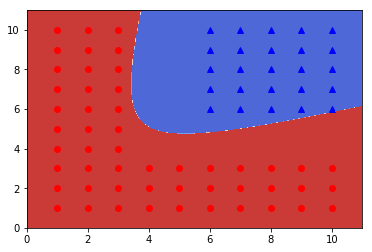

In [14]:
alpha_1_q = np.zeros(len(x1))
b1_q = 0
alpha_1_q, b1_q = kp_learn(alpha_1_q, b1_q, x1, label1, p=2)

xx1_q, yy1_q = make_meshgrid(x1[:,0], x1[:,1])
z1_q = np.array(pre_pk(alpha_1_q, b1_q, x1, np.c_[xx1_q.ravel(), yy1_q.ravel()], label1, k='quadratic', p=2)).reshape(xx1_q.shape)

fig1_q, ax1_q = plt.subplots()

ax1_q.contourf(xx1_q, yy1_q, z1_q, cmap=plt.cm.coolwarm)

for d in data1:
    if d[2] == 1:
        sty = 'o'
        ax1_q.plot(d[0], d[1], marker=sty, c='r')
    else:
        sty = '^'
        ax1_q.plot(d[0], d[1], marker=sty, c='b')

plt.show()
#fig1_q.savefig('./graphs/qkp1.png')

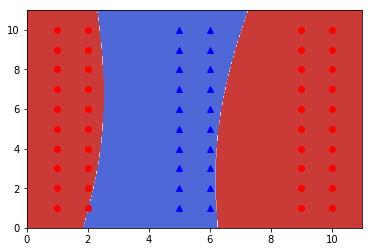

In [15]:
alpha_2_q = np.zeros(len(x2))
b2_q = 0
alpha_2_q, b2_q = kp_learn(alpha_2_q, b2_q, x2, label2, p=2)

xx2_q, yy2_q = make_meshgrid(x2[:,0], x2[:,1])
z2_q = np.array(pre_pk(alpha_2_q, b2_q, x2, np.c_[xx2_q.ravel(), yy2_q.ravel()], label2, k='quadratic', p=2)).reshape(xx2_q.shape)

fig2_q, ax2_q = plt.subplots()

ax2_q.contourf(xx2_q, yy2_q, z2_q, cmap=plt.cm.coolwarm)

for d in data2:
    if d[2] == 1:
        sty = 'o'
        ax2_q.plot(d[0], d[1], marker=sty, c='r')
    else:
        sty = '^'
        ax2_q.plot(d[0], d[1], marker=sty, c='b')

plt.show()
#fig2_q.savefig('./graphs/qkp2.png')

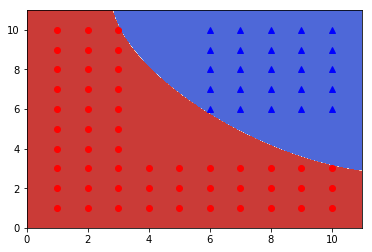

In [16]:
alpha_1_rbf = np.zeros(len(x1))
b1_rbf = 0
alpha_1_rbf, b1_rbf = kp_learn(alpha_1_q, b1_q, x1, label1, k = 'rbf', s=10)

xx1_r, yy1_r = make_meshgrid(x1[:,0], x1[:,1])
z1_r = np.array(pre_pk(alpha_1_rbf, b1_rbf, x1, np.c_[xx1_r.ravel(), yy1_r.ravel()], label1, k='rbf', s=10)).reshape(xx1_r.shape)

fig1_r, ax1_r = plt.subplots()

ax1_r.contourf(xx1_r, yy1_r, z1_r, cmap=plt.cm.coolwarm)

for d in data1:
    if d[2] == 1:
        sty = 'o'
        ax1_r.plot(d[0], d[1], marker=sty, c='r')
    else:
        sty = '^'
        ax1_r.plot(d[0], d[1], marker=sty, c='b')
        
plt.show()
#fig1_r.savefig('./graphs/rkp1_10.png')

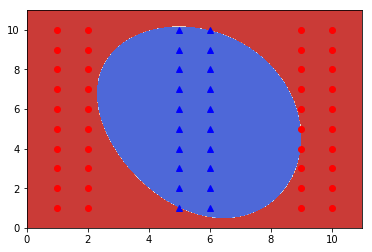

In [218]:
alpha_2_rbf = np.zeros(len(x2))
b2_rbf = 0
alpha_2_rbf, b2_rbf = kp_learn(alpha_2_q, b2_q, x2, label2, k = 'rbf', s=10)

xx2_r, yy2_r = make_meshgrid(x2[:,0], x2[:,1])
z2_r = np.array(pre_pk(alpha_2_rbf, b2_rbf, x2, np.c_[xx2_r.ravel(), yy2_r.ravel()], label2, k='rbf', s=10)).reshape(xx2_r.shape)

fig2_r, ax2_r = plt.subplots()

ax2_r.contourf(xx2_r, yy2_r, z2_r, cmap=plt.cm.coolwarm)

for d in data2:
    if d[2] == 1:
        sty = 'o'
        ax2_r.plot(d[0], d[1], marker=sty, c='r')
    else:
        sty = '^'
        ax2_r.plot(d[0], d[1], marker=sty, c='b')
        
plt.show()
#fig2_r.savefig('./graphs/rkp2_10.png')

## Kernel SVM

use support vector machines to classify the MNIST data set of handwritten digits.

### Load MNIST

In [17]:
print "Reading data..."
mndata = MNIST('./mnist_data_files')
images_train, labels_train = mndata.load_training()
data_train = zip(images_train, labels_train)
images_test, labels_test = mndata.load_testing()
print "done"

Reading data...
done


### LinearSVC

Learn a linear SVM classifier using sklearn.svm.LinearSVC with loss=’hinge’. Different values of the tradeoff parameter: C = 0.01, 0.1, 1.0, 10.0, 100.0 were tried.

In [18]:
C = [0.01, 0.1, 1.0, 10.0, 100.0]
clf = []
pre_labels_train = []
pre_labels_test = []
err_train = []
err_test = []

for i in xrange(0, len(C)):
    clf.append(LinearSVC(loss='hinge', C = C[i]))
    clf[i].fit(images_train, labels_train)
    pre_labels_train.append(clf[i].predict(images_train))
    pre_labels_test.append(clf[i].predict(images_test))
    err_train.append(sum(pre_labels_train[i] != labels_train) * 1.0 / len(labels_train))
    err_test.append(sum(pre_labels_test[i] != labels_test) * 1.0 / len(labels_test))

The data is considered as not linearly separable.

### Quadratic Kernel SVM

In [27]:
C2 = 1.0
clf2 = SVC(kernel='poly', degree=2, C=C2)
clf2.fit(images_train, labels_train)
numSV = clf2.n_support_
pre_labels_train_q = clf2.predict(images_train)
pre_labels_test_q = clf2.predict(images_test)

err_train_q = sum(pre_labels_train_q != labels_train) * 1.0 / len(labels_train)
err_test_q = sum(pre_labels_test_q != labels_test) * 1.0 / len(labels_test)